# Business Problem
- Perform clustering (Both hierarchical and K means clustering) for the airlines data to obtain optimum number of clusters

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('/content/EastWestAirlines.csv')
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
data.shape

(3999, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
data.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

**There is no NA values present**

In [6]:
data.duplicated().value_counts

<bound method IndexOpsMixin.value_counts of 0       False
1       False
2       False
3       False
4       False
        ...  
3994    False
3995    False
3996    False
3997    False
3998    False
Length: 3999, dtype: bool>

**There no Duplicates values**

In [7]:
data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [8]:
data.corr()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


# **Scaling the data**

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
df=scaler.fit_transform(data.iloc[:,:])
df

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

# Finding optimal number of cluster

cluster size: 1 , WCSS:  47987.999999999985
cluster size: 2 , WCSS:  39018.847429544236
cluster size: 3 , WCSS:  34529.1686661134
cluster size: 4 , WCSS:  30616.623636092663
cluster size: 5 , WCSS:  26894.753059893228
cluster size: 6 , WCSS:  23490.74902876985
cluster size: 7 , WCSS:  21885.368244869336
cluster size: 8 , WCSS:  19330.6951763037
cluster size: 9 , WCSS:  18015.300658980435
cluster size: 10 , WCSS:  16846.161847375988
cluster size: 11 , WCSS:  15774.923677280569
cluster size: 12 , WCSS:  14961.202455016066
cluster size: 13 , WCSS:  14217.40847436898
cluster size: 14 , WCSS:  13724.239713323048
cluster size: 15 , WCSS:  13180.28555109131


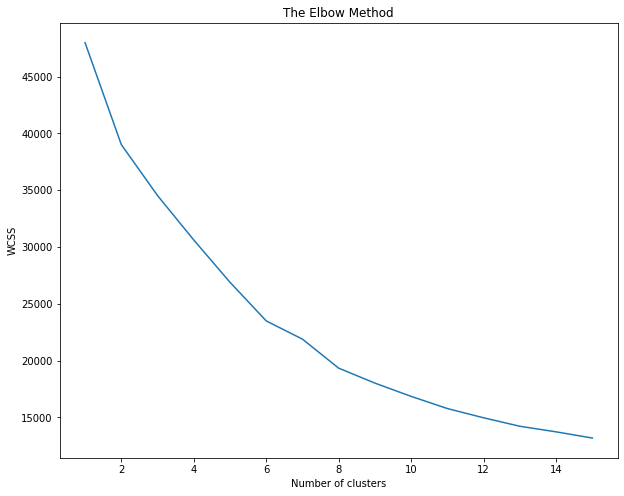

In [15]:
plt.figure(figsize=(10,8))
wcss =[]
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state =0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    print("cluster size:",i,", WCSS: " , kmeans.inertia_)

plt.plot(range(1, 16), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
kmeans.inertia_ #within a sum of square

13180.28555109131

# **Heirarchical Clustering**

In [19]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

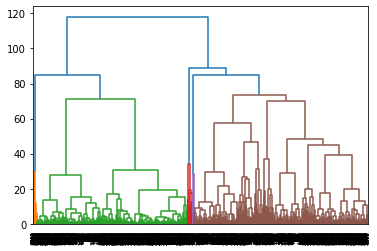

In [20]:
# Creating Dendrogram
dendrogram = sch.dendrogram(sch.linkage(df, method='ward')) #method used is ward method which is within group sum of square 
plt.show()

# Building Agglomerative Clustering Model

In [21]:
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
hc

AgglomerativeClustering(n_clusters=5)

In [22]:
#save cluster for chart
y_hc = hc.fit_predict(df)
cluster=pd.DataFrame(y_hc,columns=['Cluster'])

In [23]:
y_hc

array([1, 1, 1, ..., 0, 1, 1])

# Cheacking performance of model

In [25]:
metrics.silhouette_score(df, y_hc, metric='euclidean')

0.21818887194803396

# Buliding Cluster algorithm

In [26]:
cluster_new = KMeans(4, random_state=40)
cluster_new.fit(df)

KMeans(n_clusters=4, random_state=40)

In [27]:
cluster_new.cluster_centers_

array([[-0.79159289, -0.16435061, -0.04825387, -0.50585756,  0.02680935,
        -0.05882618, -0.46590113, -0.37645782, -0.16543415, -0.17638578,
         0.77091404, -0.23965222],
       [-0.21937913,  1.19293893,  0.85463972,  0.1048172 ,  0.16062214,
        -0.06276658,  0.63532192,  1.6738428 ,  3.59883523,  3.90180833,
         0.26628629,  0.93459683],
       [ 0.96477511, -0.33302824, -0.05337351, -0.48091901,  0.01574764,
        -0.06276658, -0.44560585, -0.38567835, -0.18294754, -0.20243324,
        -0.95144756, -0.32058346],
       [-0.42834932,  0.54252058,  0.01104681,  1.38834343, -0.08465391,
         0.18385431,  1.19798091,  0.82494974, -0.06750129, -0.07073525,
         0.42727309,  0.66210394]])

In [28]:
cluster_new.labels_

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [29]:
cluster_new.n_iter_

24

In [30]:
# Assing cluster to dataset
data["Clusterid_KMeans"] = cluster_new.labels_
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusterid_KMeans
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3


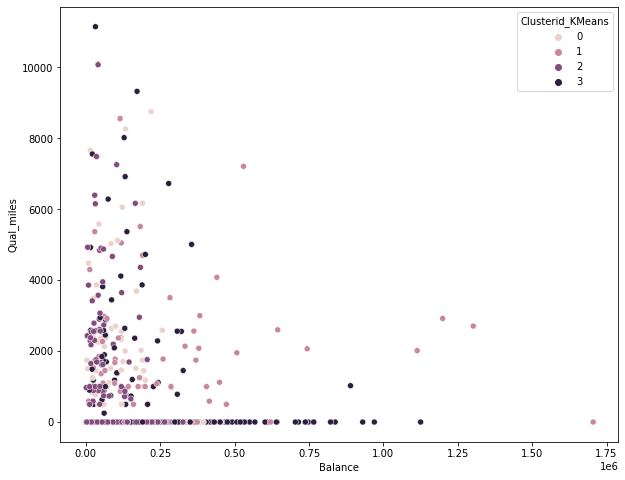

In [31]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data, x="Balance", y="Qual_miles", hue="Clusterid_KMeans" )
plt.show()

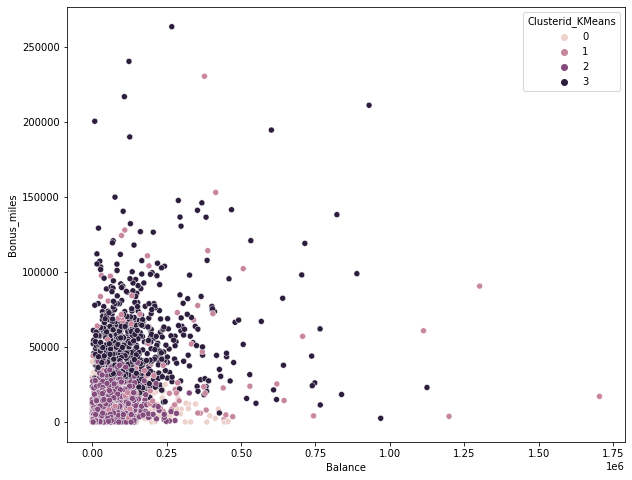

In [32]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data, x="Bonus_miles", y="", hue="Clusterid_KMeans" )
plt.show()

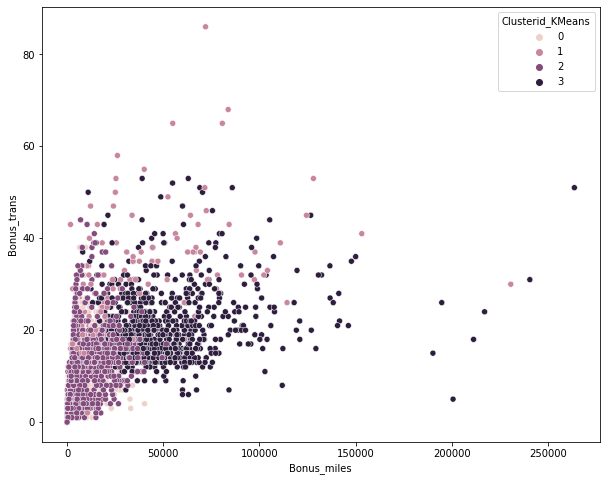

In [35]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data, x="Bonus_miles", y="Bonus_trans", hue="Clusterid_KMeans" )
plt.show()

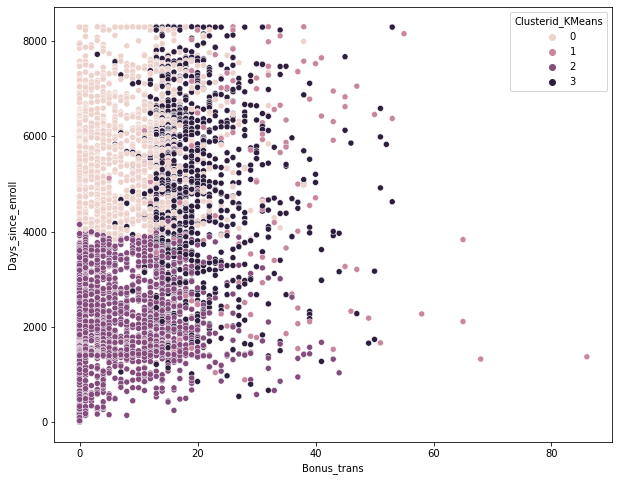

In [39]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data, x="Bonus_trans", y="Days_since_enroll", hue="Clusterid_KMeans" )
plt.show()

# Cheacking performance of model

In [34]:
from sklearn import metrics

In [33]:
metrics.silhouette_score(df, kmeans.labels_,metric='euclidean')


0.28079389810871647

# Conclusion
- By performing both algorithm we get to see
> hierarchical gives us 3 main clusterd on cut of point 100 but has less accuracy
> and in k-means we have taken 4 cluster which gives littet bet heigher accuracy than hierarchical algorithm